In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [2]:
W_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/wine.csv')
W_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
W_df.columns.value_counts()

Proanthocyanins    1
Ash                1
Alcohol            1
Hue                1
Phenols            1
Malic              1
Type               1
Alcalinity         1
Dilution           1
Color              1
Magnesium          1
Flavanoids         1
Nonflavanoids      1
Proline            1
dtype: int64

In [4]:
#Type is a categorical variable, lets drop it now
W_df1= W_df.drop(['Type'],axis=1)

In [5]:
W_df1.head(5)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
W_df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#Performing PCA

In [10]:
dataframe=W_df1.values

In [17]:
dataframe

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df_norm = norm_func(dataframe)

In [18]:
df_norm

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

In [19]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_norm)

In [20]:
pca_values

array([[ 1.89635495e-01,  1.27939250e-02,  1.86367678e-03, ...,
         5.28219472e-05, -2.29467534e-05,  4.77801459e-05],
       [ 1.80429093e-01, -3.19353145e-03,  4.06152589e-03, ...,
         2.36793241e-05, -3.40452399e-05,  8.09154665e-06],
       [ 2.60770853e-01, -3.89155676e-03, -6.62684006e-04, ...,
         1.41540730e-04, -2.90486020e-05, -2.10779181e-05],
       ...,
       [ 5.26576900e-02,  1.11772248e-02, -1.33199385e-03, ...,
        -1.32777740e-04,  5.71761518e-05,  2.15343422e-05],
       [ 5.56330203e-02,  1.11144429e-02, -1.06460114e-03, ...,
        -1.81013009e-05, -3.10079415e-05,  7.90293761e-05],
       [-1.11284320e-01, -1.26992448e-04, -3.35175331e-03, ...,
         9.56770872e-05,  1.90015753e-05,  1.60351688e-05]])

In [22]:
variance = pca.explained_variance_ratio_
variance

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [24]:
Cummulative_Variance = np.cumsum(np.round(variance,decimals = 4)*100)
Cummulative_Variance

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

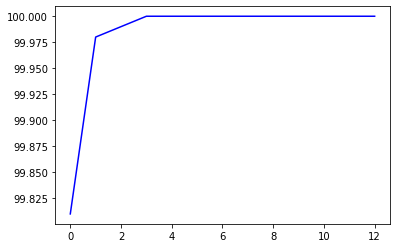

In [26]:
# Variance plot for PCA components obtained 
plt.plot(Cummulative_Variance,color="Blue")

In [28]:
finaldf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), W_df[['Type']]], axis = 1)

In [29]:
finaldf

,pc1,pc2,pc3,Type
0,0.189635,0.012794,0.001864,1
1,0.180429,-0.003194,0.004062,1
2,0.260771,-0.003892,-0.000663,1
3,0.436486,0.000115,-0.000546,1
4,-0.006888,0.011007,-0.000330,1
...,...,...,...,...
173,-0.004155,-0.002703,-0.001473,3
174,0.001864,0.001390,-0.002566,3
175,0.052658,0.011177,-0.001332,3
176,0.055633,0.011114,-0.001065,3


#K Means Clustering
Using elbow method

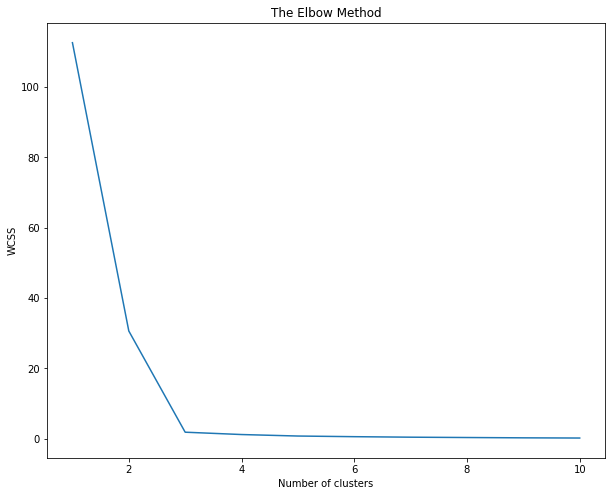

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#We can see , optimum number of custers are 3

In [31]:
model=KMeans(n_clusters=3) 
model.fit(finaldf)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [39]:
km = pd.Series(model.labels_) 
km
W_df['kclust']= km 
W_df['kclust']
W_df.iloc[:,1:7].groupby(W_df.kclust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols
kclust,,,,,,
0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750


Text(0.5, 0.98, 'Relative comparison of people in respective clusters')

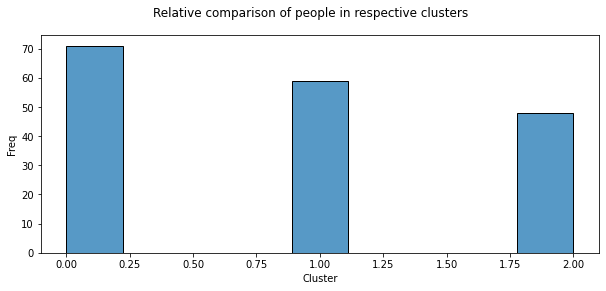

In [41]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=W_df)
plt.xlabel('Cluster')
plt.ylabel('Freq')
plt.suptitle('Relative comparison of people in respective clusters')



#Hierarchical Clustering

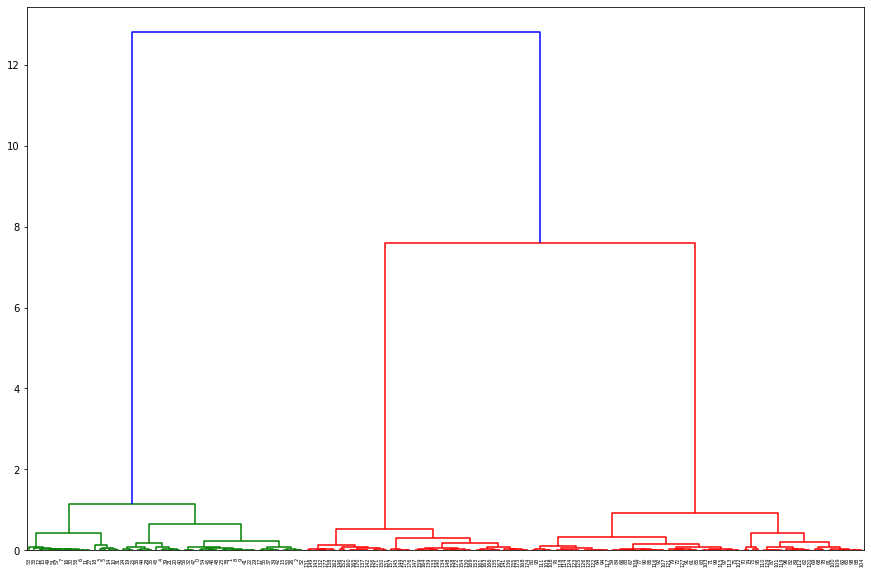

In [42]:
# dendrogram
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(finaldf, method='ward'))

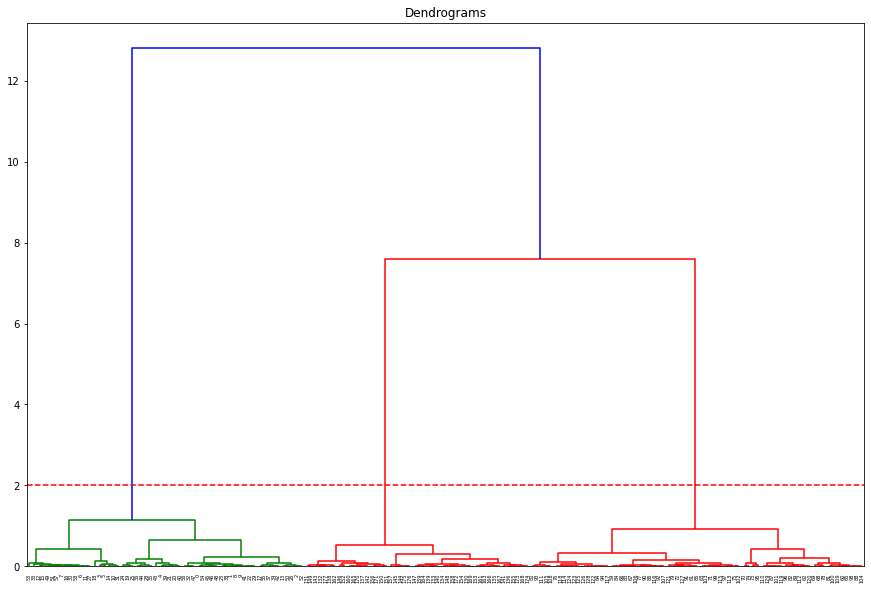

In [43]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(finaldf, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

Now, testing for optimum no of clusters in the case of original dataset (without PCA)¶

In [44]:
W_df_norm1 = norm_func(W_df1)

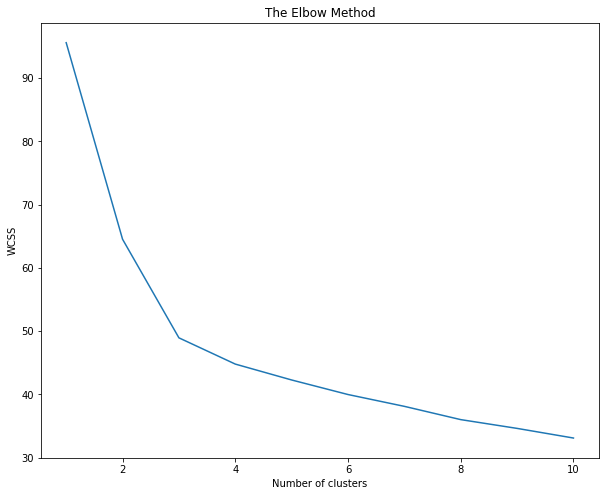

In [46]:
wcss1 = []
for k in range(1, 11):
    kmeans1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 200)
    kmeans1.fit(W_df_norm1)
    wcss1.append(kmeans1.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Hierarchical clustering

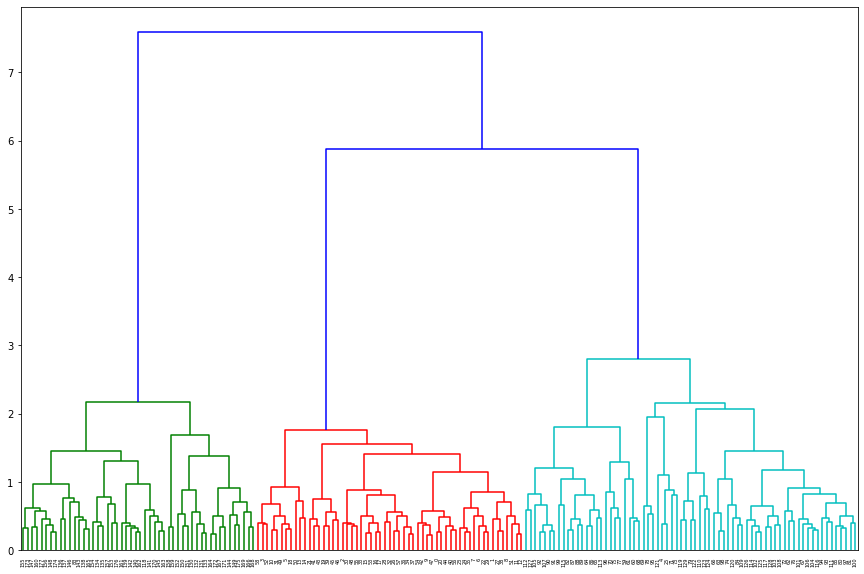

In [47]:
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(W_df_norm1, method='ward'))

#Optimum number of clusters=3